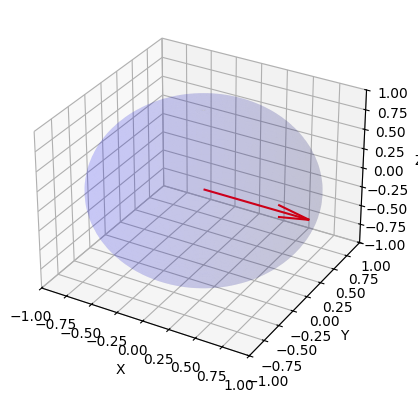

In [1]:
# Another illustration of the Bloch Sphere 
# Developed by: Dr. Michael P. Haydock - IBM Fellow Emeritus - Visiting Professor, St. Olaf College
# Initial Coding: 2/19/2025

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize a single qubit device
dev = qml.device('default.qubit', wires=1)

# Define a quantum circuit with Hadamard gate
@qml.qnode(dev)
def hadamard_circuit():
    qml.Hadamard(wires=0)
    return [qml.expval(qml.PauliX(0)), qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(0))]

# Execute the circuit
bloch_vector = hadamard_circuit()

# Plot the Bloch sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.1)

# Draw Bloch vector
ax.quiver(0, 0, 0, bloch_vector[0], bloch_vector[1], bloch_vector[2], color='r')

# Set labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()